**Question 1**

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**Solution:-**

First Matrix :- n rows, k columns
<br>
Second Matrix :- k rows, m columns 

Final Matrix :- n rows and m columns

In the resulting matrix of the multiplication, to get value of each cell we have to perform a scaler product of two vectors of length k. 

Performing this scaler product between two vectors of size k, will result in k multiplications and k-1 additions.

Since there will be a total of n x m values, the total number of operations will nm((k-1)+(k))

**Question 2**

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [5]:
#Initializing Random Matrix
import numpy as np

a = np.random.randint(1000, size = (100, 500))
b = np.random.randint(1000, size = (500, 100))

In [6]:
def matrix_mult(m1, m2):

    n = len(m1)
    k = len(m2)
    m = len(m2[0])

    final_matrix = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for l in range(k):
                final_matrix[i][j] += (m1[i][l] * m2[l][j])

    return final_matrix

In [7]:
np.matmul(a, b)

array([[129822525, 128342982, 126159141, ..., 130814447, 121250529,
        126518549],
       [134048574, 135626214, 135584839, ..., 136491877, 127124148,
        132495718],
       [129290074, 127612647, 126896091, ..., 125714622, 121981461,
        127724984],
       ...,
       [133527227, 132063095, 129319584, ..., 133157682, 129603272,
        131117932],
       [134126703, 128081635, 127881111, ..., 132598734, 125123843,
        127831845],
       [130467145, 127803960, 124810731, ..., 126689752, 122720628,
        122489776]])

In [8]:
import time

array_timings = []
for i in range(10): #Change this to a larger number
    t1 = time.time()
    matrix_mult(a, b)
    t2 = time.time()
    array_timings.append(t2 - t1)

numpy_timings = []
for i in range(10):
    t1 = time.time()
    np.matmul(a, b)
    t2 = time.time()
    numpy_timings.append(t2 - t1)

In [9]:
import statistics

print('Average Time using list of lists:- ' + str(statistics.mean(array_timings)))
print('Std. Deviation of Time using list of lists:- ' + str(statistics.stdev(array_timings)))

Average Time using list of lists:- 3.5506635189056395
Std. Deviation of Time using list of lists:- 0.06067590550092914


In [10]:
print('Average Time using Numpy:- ' + str(statistics.mean(numpy_timings)))
print('Std. Deviation of Time using Numpy:- ' + str(statistics.stdev(numpy_timings)))

Average Time using Numpy:- 0.00774540901184082
Std. Deviation of Time using Numpy:- 0.0008697837134780256


Comparing the two timings, it's clear that using Numpy is faster. 

Libraries are certainly more optimised. Some of the optimizations can be:-

*   It breaks down the task into fragments and processes them parallely.
*   Numpy is a homogenous data type stored in contiguous memory. List are heterogeneous data types stored in non-contiguous memory. 
*   It integrates C, C++ in Python which have very less execution time compared to Python.

**Question 3**

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

**Solution**

To find the median of the array using the method described in question, we need to find the largest element, second largest element, third largest element and so on, till we the find the median of the array. 

So for largest element it takes O(n) time, second largest O(2n), etc. For the middle element it will take O(n*(n/2)) time. Ignoring the constant, the complexity of this algorithm will be O(n^2).

A better method could be to just sort the array and find the median, which will take O(nlogn) time. We can also different algorithms such as Quickselect or Median of Median which have an average case complexity of O(n).

In [66]:
import copy

def get_median(orig_arr):
    arr = copy.deepcopy(orig_arr)
    n = len(arr)

    if(n%2 != 0):
        for i in range(n // 2 + 1):
            curr_max = max(arr)
            arr.remove(curr_max)
        return curr_max
    else:
        for i in range(n // 2 + 1):
            curr_max = max(arr)
            if(i == n//2 - 1):
                other_max = curr_max
            arr.remove(curr_max)
        return (curr_max + other_max)/2

In [80]:
import random
array = [random.randint(-10000, 10000) for _ in range(5000)]

array_timings = []
for i in range(100): #Change this to a larger number
    t1 = time.time()
    median = get_median(array)
    t2 = time.time()
    array_timings.append(t2 - t1)

numpy_timings = []
for i in range(100):
    t1 = time.time()
    np.median(array)
    t2 = time.time()
    numpy_timings.append(t2 - t1)

In [81]:
print('Average Time using own algo:- ' + str(statistics.mean(array_timings)))
print('Std. Deviation of Time using own algo:- ' + str(statistics.stdev(array_timings)))

Average Time using own algo:- 0.2723805713653564
Std. Deviation of Time using own algo:- 0.041673712713468127


In [82]:
print('Average Time using Numpy:- ' + str(statistics.mean(numpy_timings)))
print('Std. Deviation of Time using Numpy:- ' + str(statistics.stdev(numpy_timings)))

Average Time using Numpy:- 0.0004677104949951172
Std. Deviation of Time using Numpy:- 2.644889247523721e-05


**Question 4**

What is the gradient of the following function with respect to x and y?

$$x^2y + y^3sin(x)$$

**Solution**

Gradient of a function is the partial derivation with respect to each variable.

$$f(x,y) = x^2y + y^3sin(x)$$
$$df/dx = 2xy + y^3cos(x)$$
$$df/dy = x^2 + 3y^2sin(x)$$
<br>
$$\begin{bmatrix} df/dx \\ df/dy \end{bmatrix} = \begin{bmatrix} 2xy + y^3cos(x) \\ x^2 + 3y^2sin(x) \end{bmatrix} $$

**Question 5**

Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [95]:
import jax.numpy as jnp
import math
from jax import grad

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def explicit_grad_wrt_x(x, y):
    return 2*x*y + y**3 * jnp.cos(x)

def explicit_grad_wrt_y(x, y):
    return x**2 + 3*y**2 * jnp.sin(x)

df_dx = grad(f, argnums=0) # Compute the gradient of f with respect to x
df_dy = grad(f, argnums=1) # Compute the gradient of f with respect to y

input = [[2., 3.], [4., 6.], [4., 1.], [7., 3.]]
for curr in input:
    print(f"Explicit Gradient with respect to x: {explicit_grad_wrt_x(curr[0], curr[1])}")
    print(f"Explicit Gradient with respect to y: {explicit_grad_wrt_y(curr[0], curr[1])}")
    print(f"Gradient with respect to x: {df_dx(curr[0], curr[1])}")
    print(f"Gradient with respect to y: {df_dy(curr[0], curr[1])}")
    print()

Explicit Gradient with respect to x: 0.7640352249145508
Explicit Gradient with respect to y: 28.551029205322266
Gradient with respect to x: 0.7640352249145508
Gradient with respect to y: 28.551029205322266

Explicit Gradient with respect to x: -93.18701171875
Explicit Gradient with respect to y: -65.73467254638672
Gradient with respect to x: -93.18701171875
Gradient with respect to y: -65.73467254638672

Explicit Gradient with respect to x: 7.346356391906738
Explicit Gradient with respect to y: 13.729592323303223
Gradient with respect to x: 7.346356391906738
Gradient with respect to y: 13.729592323303223

Explicit Gradient with respect to x: 62.35536193847656
Explicit Gradient with respect to y: 66.73863983154297
Gradient with respect to x: 62.35536193847656
Gradient with respect to y: 66.73863983154297



**Question 6**

Use `sympy` to confirm that you obtain the same gradient analytically.

In [96]:
import sympy

x, y = sympy.symbols('x y')
f = x**2 * y + y**3 * sympy.sin(x)

gradient_x = sympy.diff(f, x)
gradient_y = sympy.diff(f, y)

print(f"Gradient with respect to x: {gradient_x}")
print(f"Gradient with respect to y: {gradient_y}")

Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)


**Question 7**

Create a Python nested dictionary to represent hierarchical information. 

In [97]:
student_info = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            }
        },
        "Branch 2": {}
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}

**Question 8**

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [99]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

student = Student(1, "N", {"Maths": 100, "English": 70})

branch_with_students = Branch("Branch 1", [student])
branch1 = Branch("Branch 1", [])
branch2 = Branch("Branch 2", [])

year1 = Year(2022, [branch_with_students, branch2])
year2 = Year(2023, [branch1, branch2])
year3 = Year(2024, [branch1, branch2])
year4 = Year(2025, [branch1, branch2])

database = [year1, year2, year3, year4]

**Question 9**

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x$
2. $y = x^2$
3. $y = x^3/100$
4. $y = sin(x)$
5. $y = sin(x)/x$
6. $y = log(x)$
7. $y = e^x$

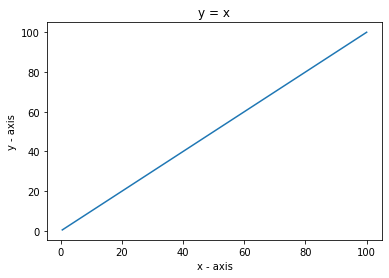

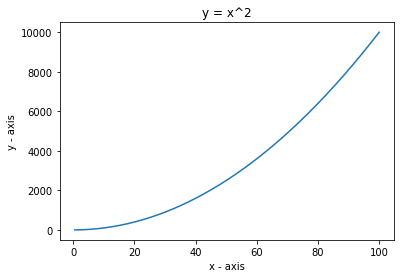

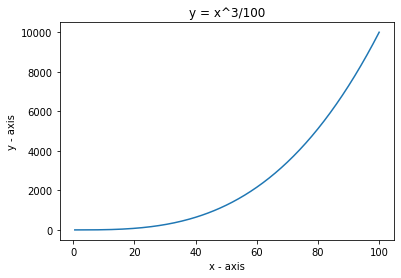

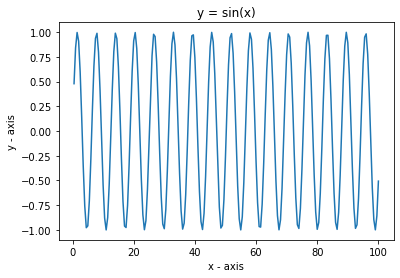

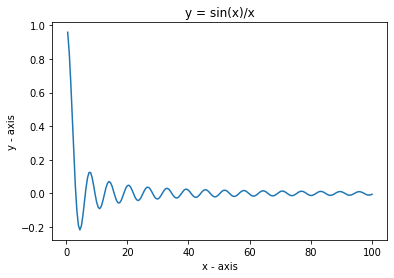

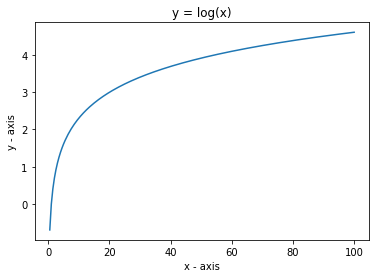

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.01, 0.5)

y = x
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('y = x')
plt.show()

y = x**2
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('y = x^2')
plt.show()

y = (x**3)/100
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('y = x^3/100')
plt.show()

y = np.sin(x)
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('y = sin(x)')
plt.show()

y = (np.sin(x))/x
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('y = sin(x)/x')
plt.show()

y = np.log(x)
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('y = log(x)')
plt.show()

y = np.exp(x)
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('y = e^x')
plt.show()

**Question 10**

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [21]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(low = 1, high = 2, size = (20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

max_std = df.std(axis = 0).idxmax()
min_mean = df.mean(axis = 1).idxmin()
print(max_std, min_mean)

           a         b         c         d         e
0   1.797752  1.746665  1.906898  1.361945  1.488465
1   1.140127  1.635431  1.450247  1.674772  1.111553
2   1.114371  1.541257  1.664750  1.255642  1.070994
3   1.785373  1.439025  1.865247  1.750431  1.746075
4   1.424476  1.836737  1.048001  1.375518  1.609531
5   1.045481  1.213327  1.602867  1.418957  1.540527
6   1.114466  1.255142  1.687946  1.377522  1.891915
7   1.397231  1.177088  1.697429  1.487579  1.628108
8   1.255704  1.142048  1.850996  1.443320  1.788983
9   1.854212  1.182129  1.273221  1.995419  1.843945
10  1.108569  1.448861  1.369372  1.936880  1.605041
11  1.418561  1.452169  1.009363  1.759363  1.569674
12  1.530192  1.411936  1.074946  1.078733  1.074387
13  1.634659  1.735883  1.584085  1.087867  1.565728
14  1.591018  1.190545  1.692112  1.199063  1.110265
15  1.936814  1.075344  1.729090  1.479975  1.436822
16  1.258673  1.191559  1.840590  1.584794  1.208419
17  1.380932  1.852485  1.617773  1.311096  1.

**Question 11**

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [22]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
print(df)

rows_where_lt8 = len(df[df['g'] == 'LT8'])

std_where_lt8 = df[df['g'] == 'LT8']['f'].std()
std_where_gt8 = df[df['g'] == 'GT8']['f'].std()
print(std_where_lt8, std_where_gt8)

           a         b         c         d         e         f    g
0   1.797752  1.746665  1.906898  1.361945  1.488465  8.301726  GT8
1   1.140127  1.635431  1.450247  1.674772  1.111553  7.012131  LT8
2   1.114371  1.541257  1.664750  1.255642  1.070994  6.647014  LT8
3   1.785373  1.439025  1.865247  1.750431  1.746075  8.586151  GT8
4   1.424476  1.836737  1.048001  1.375518  1.609531  7.294263  LT8
5   1.045481  1.213327  1.602867  1.418957  1.540527  6.821160  LT8
6   1.114466  1.255142  1.687946  1.377522  1.891915  7.326992  LT8
7   1.397231  1.177088  1.697429  1.487579  1.628108  7.387434  LT8
8   1.255704  1.142048  1.850996  1.443320  1.788983  7.481052  LT8
9   1.854212  1.182129  1.273221  1.995419  1.843945  8.148926  GT8
10  1.108569  1.448861  1.369372  1.936880  1.605041  7.468723  LT8
11  1.418561  1.452169  1.009363  1.759363  1.569674  7.209130  LT8
12  1.530192  1.411936  1.074946  1.078733  1.074387  6.170194  LT8
13  1.634659  1.735883  1.584085  1.087867  1.56

**Question 12**

Write a small piece of code to explain broadcasting in numpy.

**Explanation:-**

Broadcasting refers to how numpy treats arrays with different dimensions during arithmetic operations which can lead to constraints. 

The smaller array is broadcasted across the larger array so that they have compatible shapes. One example of it will be the following code:-

In [1]:
import numpy as np

matrix = np.array([[1, 2], [3, 4], [5, 6]])
print(matrix)
 
x = 4
print(x)

print(matrix + x)

[[1 2]
 [3 4]
 [5 6]]
4
[[ 5  6]
 [ 7  8]
 [ 9 10]]


**Question 13**

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [5]:
def find_min(array):

    if(len(array) == 0 ):
        print("Empty array")

    min = 10000000000000
    index = -1

    for i in range(len(array)):
        if(min > array[i]):
            min = array[i]
            index = i

    return (index, min)

array = np.array([6123, 344, 5656, 6767, 123, 133, 4545, 566, 67, 12, 45, 67, 888])

print(find_min(array))
print(array.argmin())

(9, 12)
9
